# Epsilon Worse

In this notebook, it is studied the impact of selecting the worse possible _`Action`_ during _Exploration_ (_Epsilon-Greedy Policy Selection_).

To be more exact, in that study during _Exploration_:
* _Propensity Scores_ are _*inverted*_: $$ \bar{p_i} =  1 - p_i$$
* For the _`Action`_ $a=\pi(\cdot)$ that _would have been chosen_ in the case of _Exploration_, its _Propensity Score_ is set as _`0`_ (the _`Action`_ is _*excluded*_ from the consideration during _Exploration_).
* For the remained _Inverted Propensity Scores_, they are _*normalised*_ as:
$$ \bar{p'_i} =  \frac{\bar{p_i}}{\sum \bar{p_j}}$$
* Finally, a new _`Action`_ is selected _*randomly*_ with probability defined by _Inverted Propensity Score_:
$$a'_i \sim \mathcal{N}(\bar{p'_i}, 0)$$

In [1]:
import gym
import matplotlib.pyplot as plt

from copy import deepcopy

%matplotlib notebook
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = [6, 3]

from reco_gym import Configuration, build_agent_init, env_1_args, gather_agent_stats, plot_agent_stats

RandomSeed = 333
NumberOfSamples = 20

ABTestNumberOfUsers = 10

TrainingDataSamples = (100, 500, 1000, 2000, 3000, 5000, 8000, 10000, 13000, 14000, 15000)
TestingDataSamples = 15000
StatEpochs = 10
StatEpochsNewRandomSeed = True

std_env_args = {
    **env_1_args,
    'random_seed': RandomSeed,
    'number_of_flips': 5,
}

env = gym.make('reco-gym-v1')
env.init_gym(std_env_args)

In [2]:
from agents import EpsilonGreedy, epsilon_greedy_args
from agents import OrganicUserEventCounterAgent, organic_user_count_args

## Std. _Epsilon-Greedy Selection Policy_

To illustrate the logic of the _*updated*_ _Epsilon-Greedy Policy Selction_, let's scrutinise offline logs below.

There is the following setup of the _std._ _Explore/Explore_ _`Environment`_:
* `epsilon:1.0`: _Epsilong-Greedy Policy Selection_ is applied _**always**_ (i.e. $\varepsilon = 1$).
* `epsilon_pure_new:False`: the _`Action`_ that would have been provided during _Explotation_, in _Exploration_ it will be _**absent**_.

For _Explotation_, the _`Agent`_ that proposes the most frequently used _`Product`_ is used. That _`Agent`_ selects an _`Action`_ based on the history of viewed _`Products`_ so far, and it _**always**_ chooses the _`Action`_ of most frequently shown _`Product`_.

In [3]:
data_01 = deepcopy(env).generate_logs(
    ABTestNumberOfUsers,
    EpsilonGreedy(
        Configuration({
            **epsilon_greedy_args,
            **std_env_args,
            'epsilon': 1,
            'epsilon_pure_new': True,
            'epsilon_select_worse': False,
        }),
        OrganicUserEventCounterAgent(Configuration({
            **organic_user_count_args,
            **std_env_args,
            'select_randomly': False,
        }))
    )
)

In [4]:
data_01[:NumberOfSamples]

,t,u,z,v,a,c,ps,ps-a
0,0,0,organic,0.0,NaN,NaN,NaN,None
1,1,0,organic,9.0,NaN,NaN,NaN,None
2,2,0,organic,6.0,NaN,NaN,NaN,None
3,3,0,organic,9.0,NaN,NaN,NaN,None
4,4,0,bandit,NaN,6.0,0.0,0.111111,"[0.1111111111111111, 0.1111111111111111, 0.111..."
5,5,0,organic,6.0,NaN,NaN,NaN,None
6,6,0,organic,3.0,NaN,NaN,NaN,None
7,7,0,organic,9.0,NaN,NaN,NaN,None
8,8,0,organic,3.0,NaN,NaN,NaN,None
9,9,0,organic,9.0,NaN,NaN,NaN,None


Thus, there are three _Organic_ _`Events`_ with the following _`Products`_:
* _`0`_
* _`9`_
* _`6`_
* _`9`_

(Look at column _*`v`*_).

Next, during the _Bandit_ _`Event`_, in the case of _Exploration_, the _`Agent`_ would have chosen _`Action`_ _`9`_ as that _`Product`_ was shown _**twice**_ ($p_9=\frac{1}{2}$; $p_0=p_6=\frac{1}{4}$).

However, we operate in _Exploration_, thus all other _`Actions`_ are selected with _**equal**_ probability.


Therefore, there are _`9`_ remained _` Actions`_ to chose, each with equal _Propensity Scores_: $\bar{p}_{i \in \{0, 1, 2, 3, 4, 5, 6, 7, 8\}} = \frac{1}{9} = 0.111...$

## _Epsilon-Greedy **Worse** Selection Policy_

Now, the _`Environment`_ setup is _**different**_:
* `epsilon_select_worse:True`: means that the _**worse**_ _`Action`_ is _tended_ to be selected during _`Exploration`_.

Also, note that now _`OrganicUserEventCounterAgent`_ selects _**randomly**_ an _`Action`_ with _Propensity Scores_ proportional to the frequency of viewd product so far i.e. $a_i \sim \mathcal{N}(p_i, 0)$.

In [5]:
data_02 = deepcopy(env).generate_logs(
    ABTestNumberOfUsers,
    EpsilonGreedy(
        Configuration({
            **epsilon_greedy_args,
            **std_env_args,
            'epsilon': 1.0,
            'epsilon_pure_new': True,
            'epsilon_select_worse': True,
        }),
        OrganicUserEventCounterAgent(Configuration({
            **organic_user_count_args,
            **std_env_args,
            'select_randomly': True,
        }))
    )
)

In [6]:
data_02[:NumberOfSamples]

,t,u,z,v,a,c,ps,ps-a
0,0,0,organic,0.0,NaN,NaN,NaN,None
1,1,0,organic,9.0,NaN,NaN,NaN,None
2,2,0,organic,6.0,NaN,NaN,NaN,None
3,3,0,organic,9.0,NaN,NaN,NaN,None
4,4,0,bandit,NaN,6.0,0.0,0.088235,"[0.08823529411764706, 0.11764705882352941, 0.1..."
5,5,0,organic,6.0,NaN,NaN,NaN,None
6,6,0,organic,3.0,NaN,NaN,NaN,None
7,7,0,organic,9.0,NaN,NaN,NaN,None
8,8,0,organic,3.0,NaN,NaN,NaN,None
9,9,0,organic,9.0,NaN,NaN,NaN,None


Now, let's look at _Bandit_ _`Events`_ at different times.

###  Time _`4`_

In [7]:
data_02[4:5]

,t,u,z,v,a,c,ps,ps-a
4,4,0,bandit,NaN,6.0,0.0,0.088235,"[0.08823529411764706, 0.11764705882352941, 0.1..."


In [8]:
list(data_02[4:5]['ps-a'])

[array([0.08823529, 0.11764706, 0.11764706, 0.11764706, 0.11764706,
        0.11764706, 0.08823529, 0.11764706, 0.11764706, 0.        ])]

Here, the _`Agent`_ would have chosen the _`Action`_ _`9`_ with $p_9 = \frac{1}{2}$ during _Exploitation_, but as it is the _Exploration_ case, that _`Action`_ was _**excluded**_ from consideration.

Next, new _**Inverse** Propensity Scores_ are calculated as follows.

_`(1)`_ Inverse all _Propensities Scores_:

$\bar{p}_{9} = 0$ (**excluded**)

$\bar{p}_{0} = \bar{p}_{6} = 1 - \frac{1}{4} = \frac{3}{4}$ (_wrong_: it should be normalised)

$\bar{p}_{i \in (1, 2, 4, 6, 7, 8, 9)} = 1 - 0 = 1$ (_wrong_: it should be normalised)

These $\bar{p}_i$ need to be normalised as follows:
$$ \bar{p}'_i = \frac{\bar{p}_i}{\sum_j \bar{p}_j} $$

_`(2)`_ Calculate _Normalised_ _**Inverse** Propensity Scores_

$\bar{p}'_{9} = 0$ (**excluded**)

$\bar{p}'_{0} = \bar{p}'_{6} =\frac{3/4}{7 + 3/4 + 3/4} = \frac{3}{34} \approx 0.08823529$

$\bar{p}'_{i \in \{1, 2, 3, 4, 5, 7, 8\}} = \frac{1}{7 + 3/4 + 3/4} = \frac{2}{17} \approx 0.11764706$

 
According to logs, we see that _`Action`_ _`6`_ was selected with _Propensity Score_ _`0.08823529`_.


###  Time _`11`_

In [9]:
data_02[11:12]

,t,u,z,v,a,c,ps,ps-a
11,11,0,bandit,NaN,2.0,0.0,0.119048,"[0.10714285714285716, 0.11904761904761907, 0.1..."


In [10]:
list(data_02[11:12]['ps-a'])

[array([0.10714286, 0.11904762, 0.11904762, 0.08333333, 0.11904762,
        0.11904762, 0.0952381 , 0.11904762, 0.11904762, 0.        ])]

At this time, _`6`_ extra _Organic_ _`Events`_ has happened.

With taking into account new _Organic_ _`Events`_, _Propensity Scores_ are:
* $p_0 = \frac{1}{10}$
* $p_3 = \frac{3}{10}$
* $p_6 = \frac{2}{10}$
* $p_9 = \frac{4}{10}$


Here, at _Time `11`_, the _`Agent`_ would have chosen the _`Action`_ _`9`_ with $p_0 = \frac{4}{10}$ during _Explotation_, but as it is the _Exploration_ case, that _`Action`_ was _**excluded**_ from consideration (remember, that now _`Agent`_ selects an _`Action`_ _**randomly**_ with $a_i \sim \mathcal{N}(p_i, 0)$).

Following the calculations, provided for _Time `4`_, we have the following _**Inverse** Propensity Scores_:
$\bar{p}'_{9} = 0$ (**excluded**)

$\bar{p}'_{0} = \frac{9/10}{6 + 9/10 + 7/10 + 8/10} = \frac{3}{28} \approx 0.10714286 $

$\bar{p}'_{3} = \frac{7/10}{6 + 9/10 + 7/10 + 8/10} = \frac{1}{12} \approx 0.08333333 $

$\bar{p}'_{6} = \frac{8/10}{6 + 9/10 + 7/10 + 8/10} = \frac{2}{21} \approx 0.0952381 $

$\bar{p}'_{i \in \{1, 2, 4, 5, 7, 8\}} = \frac{1}{6 + 9/10 + 7/10 + 8/10} = \frac{5}{42} \approx 0.11904762 $

According to logs, we see that _`Action`_ _`2`_ was selected with _Propensity Score_ _`0.11904762`_.

# Experiments

Having now two different approaches of applying _Epsilon-Greedy Policy Selction_, let's compare how it influences on model behaviour.

In [11]:
from reco_gym import TrainingApproach, build_agent_init, env_1_args, gather_exploration_stats, plot_evolution_stats

from agents import LogregPolyAgent, logreg_poly_args
from agents import LogregMulticlassIpsAgent, logreg_multiclass_ips_args

In [12]:
# A list of Agents used in this Notebook to verify the evolution of CTR.
agent_inits = {
    **build_agent_init(
        'LogReg Poly',
        LogregPolyAgent,
        {
            **logreg_poly_args,
            'with_ips': False,
        }
    ),
    **build_agent_init(
        'LogReg Poly & IPS & R',
        LogregMulticlassIpsAgent,
        {
            **logreg_multiclass_ips_args,
            'with_ips': True,
            'select_randomly': True,
        }
    ),
}

In [13]:
def merge_agent_stats(std_stats, worse_stats):
    """
    Merge Agent Stats
    :param std_stats: Stats from the Environment with Std. Epsilon-Greedy Policy Selection.
    :param worse_stats: Stats from the Environment where Worse Epsilon-Greedy Policy Selection used.
    :return: a dictionary of aggregated data.
    """

    def merge(stats, suffix):
        new_stats = dict()
        for agent_key in std_stats:
            new_stats = {
                **new_stats,
                f"{agent_key} ({suffix})": stats[agent_key]
            }
        return new_stats

    return {
        **merge(std_stats, "std"),
        **merge(worse_stats, "worse"),
    }

### Model Retraining: All Exploration Data

In [14]:
stats_all_explorations_std = gather_exploration_stats(
    env,
    std_env_args,
    {
        'epsilon_pure_new': True,
        'epsilon_select_worse': False,
    },
    agent_inits,
    TrainingApproach.ALL_EXPLORATION_DATA
)

stats_all_explorations_worse = gather_exploration_stats(
    env,
    std_env_args,
    {
        'epsilon_pure_new': True,
        'epsilon_select_worse': True,
    },
    agent_inits,
    TrainingApproach.ALL_EXPLORATION_DATA
)

Agent: LogReg Poly
Start: ε = 0.00
Start: ε = 0.01
Start: ε = 0.03
Start: ε = 0.02
Start: ε = 0.05
Start: ε = 0.08
End: ε = 0.05 (1828.5717928409576s)
End: ε = 0.00 (1870.3435099124908s)
End: ε = 0.03 (1905.071549654007s)
End: ε = 0.02 (1938.1456747055054s)
End: ε = 0.08 (1953.5639057159424s)
End: ε = 0.01 (1968.7551283836365s)
Agent: LogReg Poly & IPS & R
Start: ε = 0.08
Start: ε = 0.02
Start: ε = 0.05
Start: ε = 0.01
Start: ε = 0.00
Start: ε = 0.03
End: ε = 0.03 (1406.3472354412079s)
End: ε = 0.00 (1420.3254599571228s)
End: ε = 0.02 (1472.0459213256836s)
End: ε = 0.01 (1479.3554472923279s)
End: ε = 0.05 (1490.8798344135284s)
End: ε = 0.08 (1508.2989015579224s)
Agent: LogReg Poly
Start: ε = 0.02
Start: ε = 0.01
Start: ε = 0.05
Start: ε = 0.00
Start: ε = 0.03
Start: ε = 0.08
End: ε = 0.03 (1634.671134710312s)
End: ε = 0.05 (1658.645335674286s)
End: ε = 0.00 (1763.092090845108s)
End: ε = 0.02 (1845.1288781166077s)
End: ε = 0.08 (1851.5562014579773s)
End: ε = 0.01 (1875.4250509738922s)
A

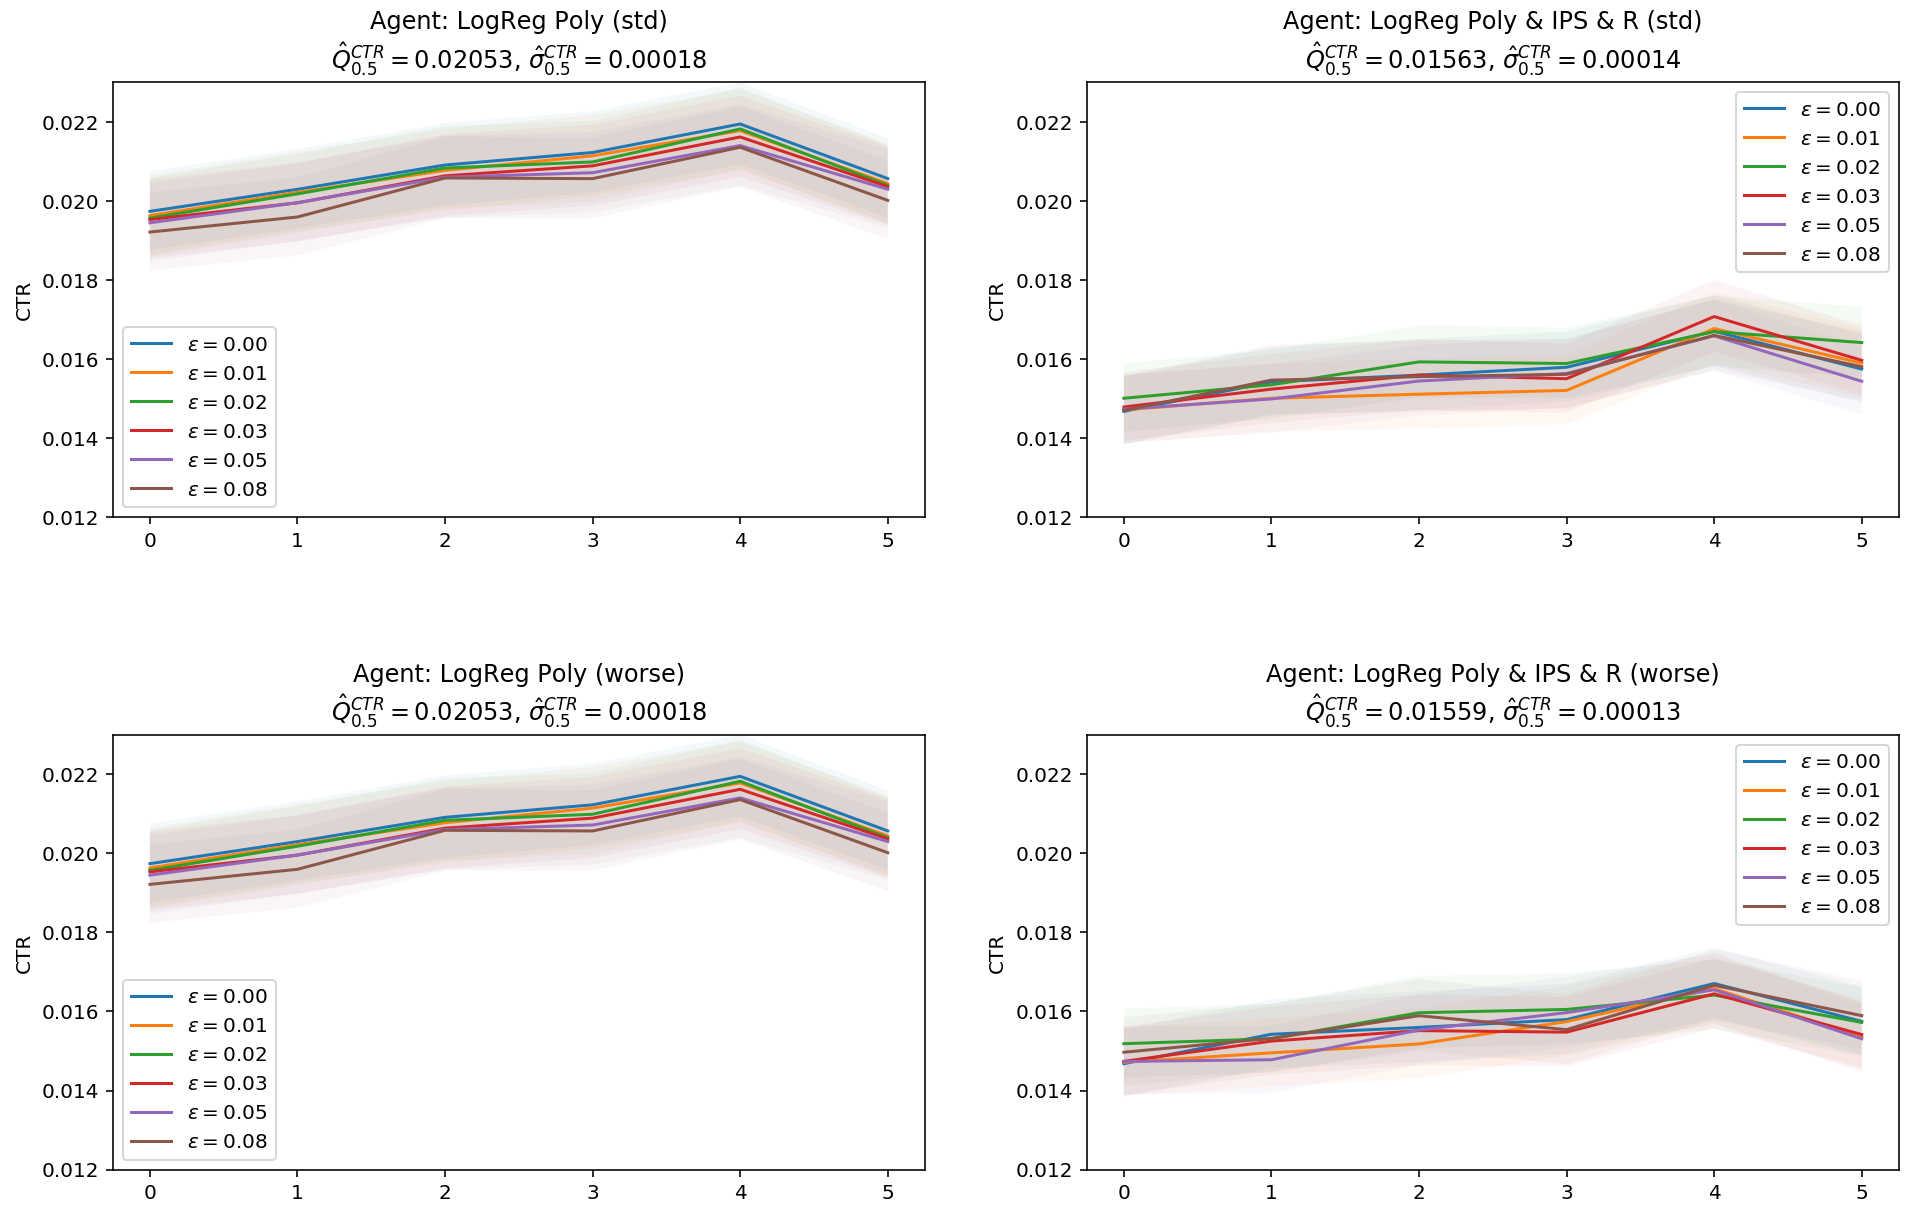

In [23]:
plot_evolution_stats(
    merge_agent_stats(stats_all_explorations_std, stats_all_explorations_worse),
    2,
    (0.00, 0.01, 0.02, 0.03, 0.05, 0.08),
    0.012,
    0.023
)

### Model Retraining: the _Latest_ Set of Data

In [16]:
stats_last_step_std = gather_exploration_stats(
    env,
    std_env_args,
    {
        'epsilon_pure_new': True,
        'epsilon_select_worse': False,
    },
    agent_inits,
    TrainingApproach.LAST_STEP
)

stats_last_step_worse = gather_exploration_stats(
    env,
    std_env_args,
    {
        'epsilon_pure_new': True,
        'epsilon_select_worse': True,
    },
    agent_inits,
    TrainingApproach.LAST_STEP
)

Agent: LogReg Poly
Start: ε = 0.00
Start: ε = 0.01
Start: ε = 0.05
Start: ε = 0.02
Start: ε = 0.03
Start: ε = 0.08
End: ε = 0.08 (1871.5039484500885s)
End: ε = 0.01 (1875.974979877472s)
End: ε = 0.05 (1922.3554091453552s)
End: ε = 0.03 (1940.6344199180603s)
End: ε = 0.00 (1958.606317281723s)
End: ε = 0.02 (2016.083489894867s)
Agent: LogReg Poly & IPS & R
Start: ε = 0.05
Start: ε = 0.03
Start: ε = 0.02
Start: ε = 0.01
Start: ε = 0.00
Start: ε = 0.08
End: ε = 0.00 (1801.0417819023132s)
End: ε = 0.08 (1834.4286601543427s)
End: ε = 0.05 (1919.504406929016s)
End: ε = 0.03 (2000.1135022640228s)
End: ε = 0.01 (2001.1464002132416s)
End: ε = 0.02 (2002.7697641849518s)
Agent: LogReg Poly
Start: ε = 0.05
Start: ε = 0.00
Start: ε = 0.01
Start: ε = 0.08
Start: ε = 0.03
Start: ε = 0.02
End: ε = 0.02 (1987.9283661842346s)
End: ε = 0.01 (1990.7800438404083s)
End: ε = 0.03 (2039.021192073822s)
End: ε = 0.08 (2084.4755210876465s)
End: ε = 0.00 (2114.401973247528s)
End: ε = 0.05 (2128.243290901184s)
Agen

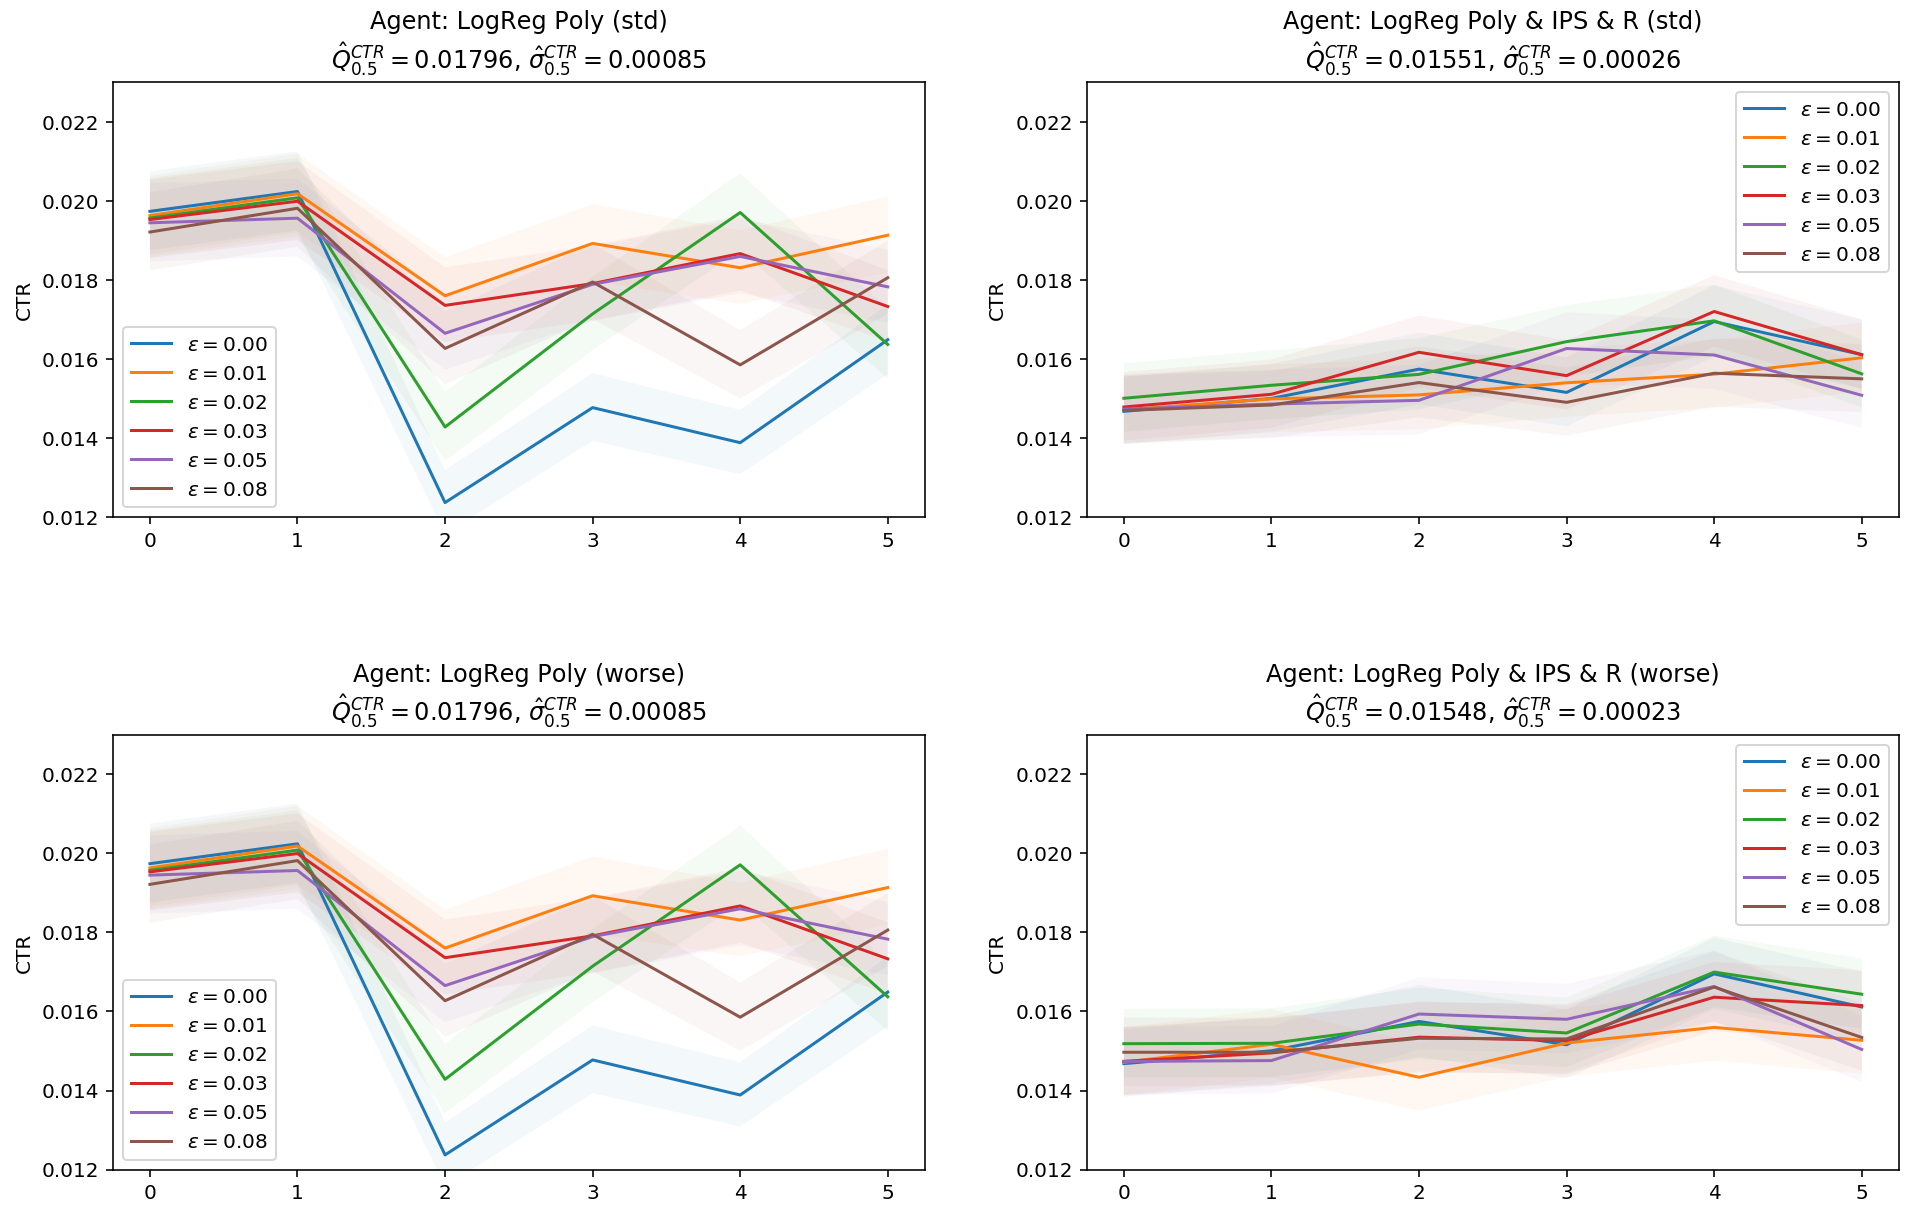

In [22]:
plot_evolution_stats(
    merge_agent_stats(stats_last_step_std, stats_last_step_worse),
    2,
    (0.00, 0.01, 0.02, 0.03, 0.05, 0.08),
    0.012,
    0.023
)

# Resolution

_Epsilon-Greedy **Worse** Selection Policy_ brings very small benefit comparing to std. _Epsilon-Greedy Selection Policy_.